In [111]:
import pandas as pd
import numpy as np
import joblib
import ast
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import joblib
import ast
from joblib import Parallel, delayed
import json
import os
from tqdm import tqdm
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import OPTICS, Birch, AgglomerativeClustering, KMeans, AffinityPropagation, FeatureAgglomeration
from sklearn.decomposition import PCA, KernelPCA, NMF
import os, pdb
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import silhouette_samples, silhouette_score


In [102]:

item_data = pd.read_csv('/opt/ml/wine/data/item_data.csv', encoding = 'utf-8-sig')
#review_data = pd.read_csv('/opt/ml/wine/data/review_df.csv', encoding = 'utf-8-sig')

In [71]:
item_data

,country,region,winery,winetype,grape,name,vintage,house,price,rating,...,Ageing_seq,Black_Fruit_seq,Citrus_seq,Dried_Fruit_seq,Earthy_seq,Floral_seq,Microbio_seq,Spices_seq,Vegetal_seq,item_id
0,France,Bordeaux,Château_Tour_de_Biot,Red_wine,"['Merlot', 'CabernetSauvignon', 'CabernetFranc']",Bordeaux 2018,2018.0,Château_Tour_de_Biot,18.99,3.4,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,Italy,Moscato_d'Asti,Pio_Cesare,Sparkling_wine,['MoscatoBianco'],Moscato d'Asti 2020,2020.0,Pio_Cesare,21.99,4.2,...,"[0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6666666...","[0, 0.058823529411764705, 0, 0, 0, 0, 0.117647...","[0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0.8, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0.16666666666666666, 0, 0, 0, 0, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,France,Régnié,G._Descombes,Red_wine,['Gamay'],Régnié 2020,2020.0,G._Descombes,31.99,4.0,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0.35294117647058826, 0.029411764705882353,...","[0, 0, 0, 0, 0, 0, 0, 0, 0.6666666666666666, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3333333...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0147...","[0.047619047619047616, 0, 0.09523809523809523,...","[0, 0, 0, 0, 0, 0, 0, 0, 0.6666666666666666, 0...","[0, 0, 0.46511627906976744, 0, 0.0232558139534...","[0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0.1, 0, 0, 0, 0,...",2
3,United_States,California,AVA_Grace,Rosé_wine,['PinotGris'],Rosé 2019,2019.0,AVA_Grace,8.99,3.6,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.3333333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0.011363636363636364, 0.056818...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0.5, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0.09090909090909091, 0, 0, 0.2727272727...","[0, 0, 0, 0, 0, 0, 0, 0, 0.07142857142857142, ...","[0, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
4,France,Champagne,Louis_Dumont,Sparkling_wine,"['Chardonnay', 'PinotNoir', 'PinotMeunier']",Brut Rosé Champagne N.V.,NaN,Louis_Dumont,NaN,3.7,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77829,Spain,Jerez-Xérès-Sherry,Lustau,Fortified_Wine,['Palomino'],La Ina Fino N.V.,NaN,Lustau,NaN,3.5,...,"[0, 0.0392156862745098, 0, 0.00980392156862745...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0.024390243902439025, 0, 0, 0, 0.024390...","[0, 0, 0, 0, 0, 0, 0.4, 0, 0, 0, 0, 0, 0.6, 0,...","[0.015625, 0, 0, 0, 0, 0, 0, 0, 0.015625, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0.023255813953488372, 0.023255813953488372...","[0, 0.1111111111111111, 0.2222222222222222, 0,...","[0, 0, 0, 0, 0, 0, 0.3333333333333333, 0, 0.11...",74917
77830,Italy,Barbaresco,Vietti,Red_wine,['Nebbiolo'],Barbaresco Masseria 2016,2016.0,Vietti,208.33,4.1,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2857142857142857...","[0, 0.1666666

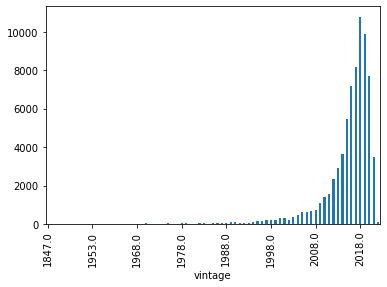

In [21]:
ax = item_data[item_data['vintage'] > 1000]['vintage'].value_counts().sort_index().plot(kind='bar')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

In [49]:
wine_vintage = item_data.groupby('vintage').agg({'vintage':'count',
                                                 'price':['mean','min','max'],
                                                 'rating': ['mean']})
wine_vintage

vintage      price                   rating
          count       mean    min     max      mean
vintage                                            
9.0           1  18.990000  18.99   18.99  4.000000
1847.0        1  26.990000  26.99   26.99  4.300000
1881.0        1  38.750000  38.75   38.75  4.300000
1908.0        1  12.990000  12.99   12.99  3.700000
1924.0        3  15.463333  11.95   17.49  4.033333
...         ...        ...    ...     ...       ...
2018.0    10788  52.493587   0.01  969.00  3.999045
2019.0     9890  41.009985   0.27  950.00  3.967189
2020.0     7710  29.334806   0.01  699.99  3.905162
2021.0     3476  23.697964   1.93  689.99  3.897756
2022.0       99  19.092062   4.03   58.72  3.919192

[76 rows x 5 columns]

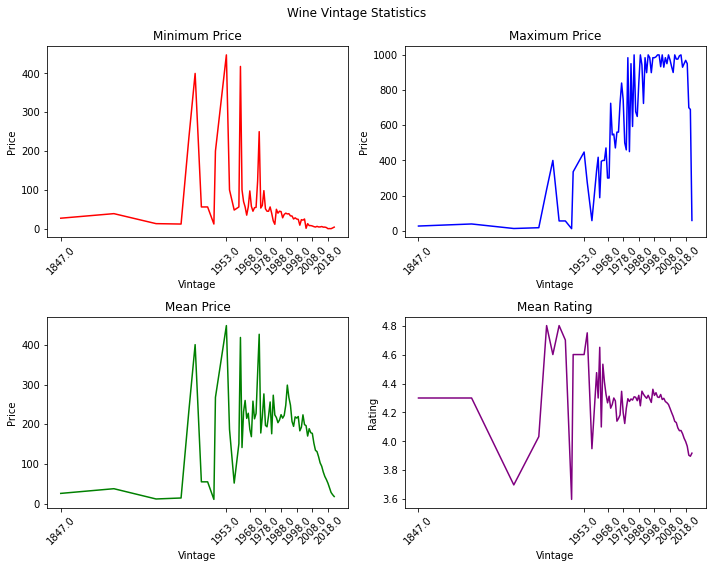

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Wine Vintage Statistics')

# Plotting price values on the left y-axis
axs[0, 0].plot(wine_vintage.index, wine_vintage['price']['min'], color='red', label='Min Price')
axs[0, 0].set_title('Minimum Price')
axs[0, 0].set_xlabel('Vintage')
axs[0, 0].set_ylabel('Price')

axs[0, 1].plot(wine_vintage.index, wine_vintage['price']['max'], color='blue', label='Max Price')
axs[0, 1].set_title('Maximum Price')
axs[0, 1].set_xlabel('Vintage')
axs[0, 1].set_ylabel('Price')

axs[1, 0].plot(wine_vintage.index, wine_vintage['price']['mean'], color='green', label='Mean Price')
axs[1, 0].set_title('Mean Price')
axs[1, 0].set_xlabel('Vintage')
axs[1, 0].set_ylabel('Price')

axs[1, 1].plot(wine_vintage.index, wine_vintage['rating']['mean'], color='purple')
axs[1, 1].set_title('Mean Rating')
axs[1, 1].set_xlabel('Vintage')
axs[1, 1].set_ylabel('Rating')

# Creating a secondary y-axis for mean_rating
x_ticks = wine_vintage.index[::10]  # Select every other vintage for ticks
axs[1, 1].set_xticks(x_ticks)
axs[0, 1].set_xticks(x_ticks)
axs[1, 0].set_xticks(x_ticks)
axs[0, 0].set_xticks(x_ticks)

axs[1, 1].set_xticklabels(x_ticks, rotation=45) 
axs[0, 1].set_xticklabels(x_ticks, rotation=45) 
axs[1, 0].set_xticklabels(x_ticks, rotation=45) 
axs[0, 0].set_xticklabels(x_ticks, rotation=45) 


plt.tight_layout()
plt.show()

In [40]:
non_vintage = item_data[item_data['vintage'].isna()]

In [43]:
non_vintage

,country,region,winery,winetype,grape,name,vintage,house,price,rating,...,tomato,hay,tomato leaf,red bell pepper,chard,lavage,fresh-cut grass,peppercress,chayote squash,item_id
4,France,Champagne,Louis_Dumont,Sparkling_wine,"['Chardonnay', 'PinotNoir', 'PinotMeunier']",Brut Rosé Champagne N.V.,NaN,Louis_Dumont,NaN,3.7,...,0,0,0,0,0,0,0,NaN,NaN,4
12,United_States,Sonoma_County,Piper_Sonoma,Sparkling_wine,"['PinotMeunier', 'PinotNoir', 'Chardonnay']",Brut (Select Cuvée) N.V.,NaN,Piper_Sonoma,NaN,3.6,...,0,0,0,0,1,0,0,NaN,NaN,12
26,United_States,Temecula_Valley,Doffo,Fortified_Wine,[],Port N.V.,NaN,Doffo,NaN,3.6,...,0,0,0,0,0,0,0,NaN,NaN,26
46,Austria,Burgenland,Kracher,Dessert_wine,"['588', 'Chardonnay', 'Traminer']",Noble Reserve Trockenbeerenauslese N.V.,NaN,Kracher,NaN,4.2,...,0,1,0,0,0,0,0,NaN,NaN,46
85,Spain,Amontillado_Sherry,Valdespino,Fortified_Wine,['Palomino'],Coliseo Amontillado VORS N.V.,NaN,Valdespino,NaN,4.5,...,1,0,0,0,0,0,0,NaN,NaN,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77756,France,Champagne_Grand_Cru_'Chouilly',Nicolas_Feuillatte,Sparkling_wine,"['PinotMeunier', 'PinotNoir', 'Chardonnay']",Brut Premier Cru Champagne N.V.,NaN,Nicolas_Feuillatte,NaN,3.6,...,0,0,0,0,0,0,0,0.0,0.0,74844
77757,France,Champagne_Grand_Cru_'Oger',Chapuy,Sparkling_wine,"['Chardonnay', 'PinotNoir', 'PinotMeunier']",Tradition Brut Champagne Grand Cru 'Oger' N.V.,NaN,Chapuy,NaN,3.9,...,0,0,0,0,0,0,0,0.0,0.0,74845
77791,Portugal,Porto,C._da_Silva,Fortified_Wine,"['1716', 'TourigaNacional']",Dalva Tawny 20 Years Old Port N.V.,NaN,C._da_Silva,NaN,4.1,...,0,0,0,0,0,0,0,0.0,0.0,74879
77817,Italy,Prosecco,Villa_Jolanda,Sparkling_wine,['Glera'],Prosecco N.V.,NaN,Villa_Jolanda,NaN,3.6,...,0,1,0,0,0,0,0,0.0,0.0,74905


In [47]:
non_vintage.groupby('winetype').agg({'winetype':'count',
                                     'price':['mean','max','min'],
                                     'rating':'mean'})

winetype      price                  rating
                  count       mean     max   min      mean
winetype                                                  
Dessert_wine         52  17.773000   79.42  7.49  3.894231
Fortified_Wine      740  45.821613  299.99  5.49  3.892287
Red_wine             84  45.488286  689.99  7.99  3.840476
Rosé_wine            28  14.225000   29.99  7.49  3.803571
Sparkling_wine     2027  45.862058  449.99  6.99  3.856339
White_wine           48  13.685000   19.47  9.95  3.560417

In [58]:
wine_vintage[wine_vintage['rating']['mean'] < 4.1]

vintage       price                   rating
          count        mean    min     max      mean
vintage                                             
9.0           1   18.990000  18.99   18.99  4.000000
1908.0        1   12.990000  12.99   12.99  3.700000
1924.0        3   15.463333  11.95   17.49  4.033333
1945.0        1   11.990000  11.99   11.99  3.600000
1958.0        2   52.830000  47.99   57.67  3.950000
2013.0     2895  103.508259   4.50  976.00  4.093195
2014.0     3626   95.061531   5.56  995.00  4.074297
2015.0     5444   80.730261   3.99  999.97  4.075625
2016.0     7168   69.476395   4.05  929.99  4.053530
2017.0     8158   61.673261   2.97  950.00  4.021917
2018.0    10788   52.493587   0.01  969.00  3.999045
2019.0     9890   41.009985   0.27  950.00  3.967189
2020.0     7710   29.334806   0.01  699.99  3.905162
2021.0     3476   23.697964   1.93  689.99  3.897756
2022.0       99   19.092062   4.03   58.72  3.919192

In [116]:
def str2list(x):
    try:
        return ast.literal_eval(x)
    except: return x


def make_cluster(vec, n_cluster):
    clusters = GaussianMixture(n_components=n_cluster).fit(vec)
    return clusters


In [126]:
def viz_cluster(df, col):
    
    df[col] = df[col].apply(lambda x : str2list(x))
    vec = list(df[col].values)
    vec = [v for v in vec if sum(v) != 0]
    vec = np.array(vec)

    n_cols = len(range(2,8))
    fig, axs = plt.subplots(figsize=(4*n_cols, 10), nrows=2, ncols=n_cols)
    for ind, n_cluster in enumerate(range(2,8)):
        clusters = make_cluster(vec, n_cluster)
        cluster_labels = clusters.fit_predict(vec)
        df = pd.DataFrame()
        groups = {}
        for i, vector in enumerate(vec): df[i] = vector
        df = df.T
        cluster = []
        for label in cluster_labels: cluster.append(label)
        df['cluster'] = cluster
        if len(set(cluster)) == 1: continue
        
        sil_avg = silhouette_score(vec, df['cluster'])
        sil_values = silhouette_samples(vec, df['cluster'])
        y_lower = 10

        axs[0,ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                        'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[0,ind].set_xlabel("The silhouette coefficient values")
        axs[0,ind].set_ylabel("Cluster label")
        axs[0,ind].set_xlim([-0.1, 1])
        axs[0,ind].set_yticks([])  
        axs[0,ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()


            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[0,ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[0,ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
            y_lower = y_upper + 10

            # 클러스터링된 데이터 시각화
            axs[1,ind].scatter(vec[:, 0], vec[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=df['cluster'])
            axs[1,ind].set_title("Clustered data")
            axs[1,ind].set_xlabel("Feature space for the 1st feature")
            axs[1,ind].set_ylabel("Feature space for the 2nd feature")  

        # 군집별 중심 위치 좌표 시각화 
        unique_labels = np.unique(cluster_labels)
        axs[0,ind].axvline(x=sil_avg, color="red", linestyle="--")

In [127]:
import matplotlib.cm as cm
viz_cluster(item_data, 'Ageing_seq')

/tmp/ipykernel_2598/910888120.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  for i, vector in enumerate(vec): df[i] = vector
/tmp/ipykernel_2598/910888120.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  for i, vector in enumerate(vec): df[i] = vector
/tmp/ipykernel_2598/910888120.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

IndexError: index 2 is out of bounds for axis 1 with size 2